<a href="https://colab.research.google.com/github/ClementPla/DeepFiberQ/blob/main/DeepFiberQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Instructions

Create a data folder on the left panel and upload your images in it.

The accepted formats are tif or czi. But czi seems buggy, so tif preferred for now.

## GPUs

If available, we recommend using a GPU (available on the top right, in the dropdown, select "Change runtime type)"


In [1]:
!pip uninstall -y dnafiber
!pip install -q git+https://github.com/ClementPla/DeepFiberQ

Found existing installation: dnafiber 0.1.950
Uninstalling dnafiber-0.1.950:
  Successfully uninstalled dnafiber-0.1.950

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path


from dnafiber import get_model
from dnafiber.inference import (
    run,
    convert_to_dataset,
    convert_mask_to_image,
    load_image,
)


In [3]:
output = Path("output")
output.mkdir(exist_ok=True, parents=True)

In [4]:
def save(df, mask, filepath):
    output_csv = output / "csv" / (d.stem + ".csv")
    output_mask = output / "mask" / (d.stem + ".png")
    output_color = output / "color" / (d.stem + ".png")

    output_csv.parent.mkdir(exist_ok=True, parents=True)
    output_mask.parent.mkdir(exist_ok=True, parents=True)
    output_color.parent.mkdir(exist_ok=True, parents=True)

    mask_color = convert_mask_to_image(mask, expand=10)
    cv2.imwrite(str(output_mask), mask.astype(np.uint8))
    cv2.imwrite(str(output_color), mask_color[:, :, ::-1])

    df.to_csv(output_csv, index=False)


In [5]:
model = get_model()
for d in Path("data/").rglob("*.tif"):
    mask, counts = run(model, str(d), use_cuda=True)
    # If you don't have GPUs, set use_cuda=False

    df = convert_to_dataset(counts)
    save(df, mask, d)


/home/clement/Documents/Projets/DNAFiber/dnafiber/inference.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  data["ratio"].append(v["green"] / (v["red"]))


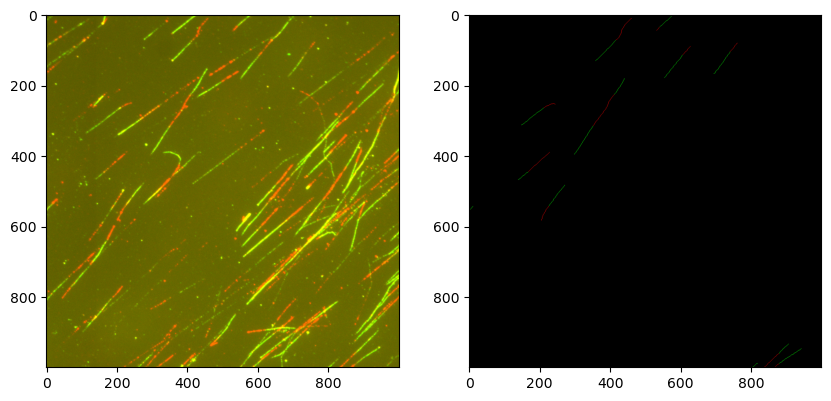

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
image = load_image(str(d))
mask_color = convert_mask_to_image(mask, expand=0)
slices = [slice(0, -1), slice(0, -1)]
slices = [slice(3000, 4000), slice(0, 1000)]
axs[0].imshow(image[*slices])
axs[1].imshow(mask_color[*slices])
plt.show()


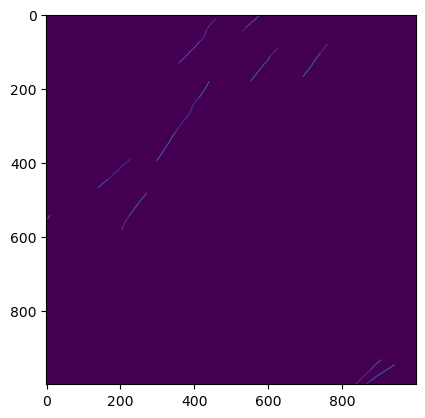

In [ ]:
%load_ext autoreload
%autoreload 2

from dnafiber.post_process import PostProcessor

post_processor = PostProcessor(mask[*slices])
r = post_processor.apply()
plt.imshow(r)